Missing Values:
 name      1
age       0
salary    1
city      0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [name, age, salary, city]
Index: []

Data Types:
 name      object
age        int64
salary    object
city      object
dtype: object

Descriptive Statistics:
               age
count    9.000000
mean    49.555556
std     56.584254
min     25.000000
25%     29.000000
50%     30.000000
75%     35.000000
max    200.000000


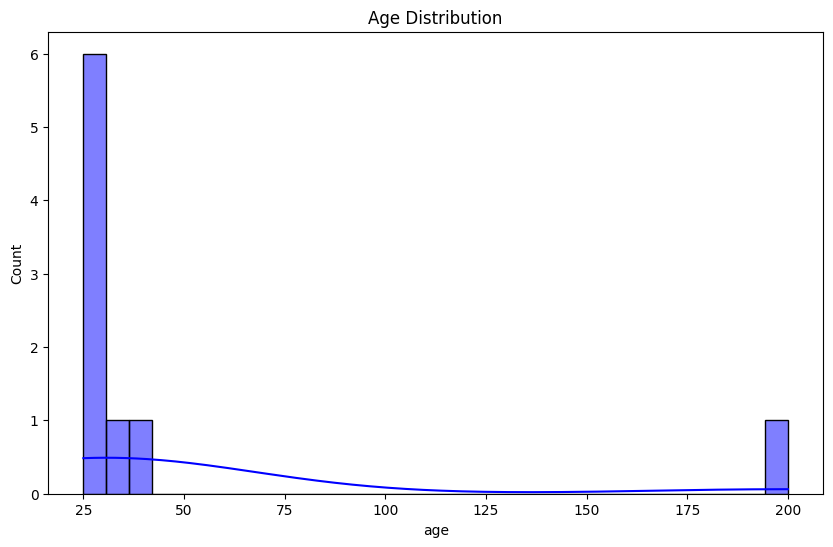

TypeError: '<' not supported between instances of 'str' and 'int'

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Example: Replace with actual dataset)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# Sample Data (Remove this if you're using an actual dataset)
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', None, 'Grace', 'Alice'],
    'age': [25, 30, 35, 40, 28, 29, 29, 200, 30],  # Some unrealistic ages
    'salary': [50000, 55000, None, 58000, 'Unknown', 60000, 65000, 70000, 70000],  # Invalid salary
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'Chicago', 'Phoenix', 'Los Angeles']
}
df = pd.DataFrame(data)

# 1. Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Identify Duplicates
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicates)

# 3. Data Types
print("\nData Types:\n", df.dtypes)

# 4. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# 5. Data Distribution (Numeric Columns)
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

# 6. Check for Outliers in 'age' and 'salary' (Using IQR Method)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(df, 'age')
outliers_salary = detect_outliers_iqr(df, 'salary')

print("\nOutliers in 'age':\n", outliers_age)
print("\nOutliers in 'salary':\n", outliers_salary)

# 7. Invalid Values Check (For Salary Column)
invalid_salary = df[~df['salary'].apply(pd.to_numeric, errors='coerce').notnull()]
print("\nInvalid salary values:\n", invalid_salary)